In [72]:
load("../../Github/ECO224/data/wage2015_subsample_inference.Rdata")
attach(data) # make each variable as an object 

dim(data)

The following objects are masked from data (pos = 3):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we


The following objects are masked from data (pos = 4):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we


The following objects are masked from data (pos = 5):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we


The following objects are masked from data (pos = 6):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we


The following objects are masked from data (pos = 11):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we




[1] 5150   20

## 1. Three different models 

In [ ]:
# Calling for the library and stimating the basic model 

nocontrol.fit <- lm(lwage ~ sex)
summary(nocontrol.fit)

## OLS with controls: lwage, sex and other covariates

In [ ]:
# OLS

flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
control.fit <- lm(flex, data=data)
control.est <- summary(control.fit)$coef[2,1] # to choose the interest variable
summary(control.est)

## Partialling-Out using OLS

In [ ]:
# models
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for D

In [ ]:
# errors

# effect of 'W' from 'Y'
t.Y <- lm(flex.y, data=data)$res
# effect of 'W' from 'D'
t.D <- lm(flex.d, data=data)$res

In [ ]:
# the last regression between previous errors found

partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1] # to rescue the interest coefficient
summary(partial.est)

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

# 2. Estadística Descriptiva

## Dummy variables

### a. Sex

In [11]:
install.packages("ggplot2")

Installing package into 'D:/Kenia/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kenia\AppData\Local\Temp\RtmpInsAoZ\downloaded_packages


In [18]:
library("ggplot2")

In [65]:
install.packages("dplyr")
library(dplyr)

Installing package into 'D:/Kenia/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar D:\Kenia\Documents\R\win-library\4.0\00LOCK\dplyr\libs\x64\dplyr.dll  a D:\Kenia\Documents\R\win-library\4.0\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Kenia\AppData\Local\Temp\RtmpInsAoZ\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




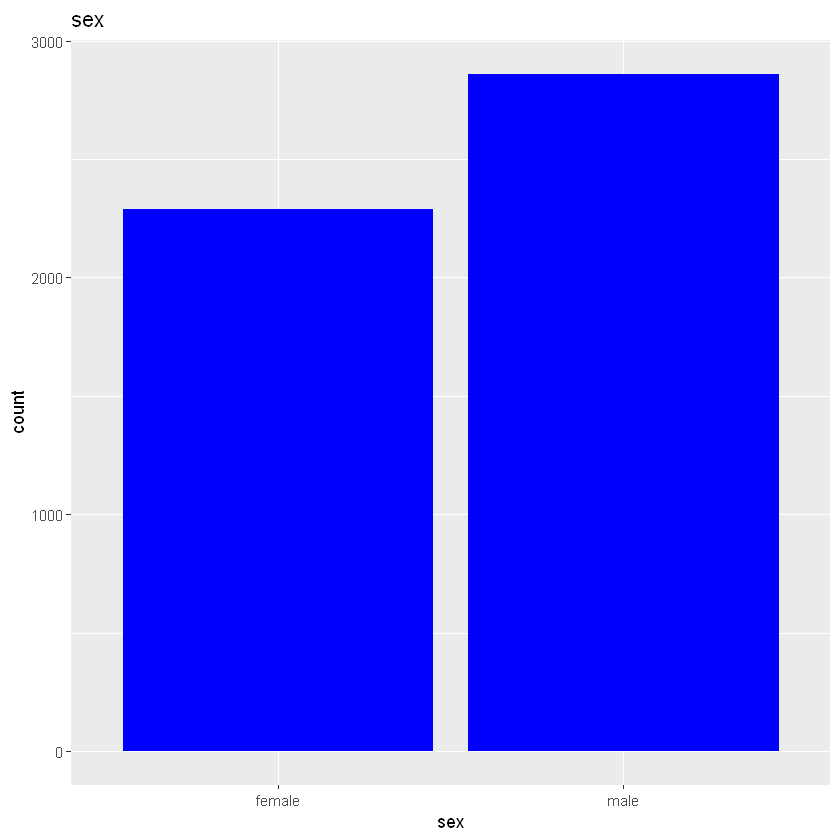

In [81]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"

data1 <- ggplot(df,aes(sex))
data1 + geom_bar(fill = "blue") + ggtitle("sex")

### b. education by sex

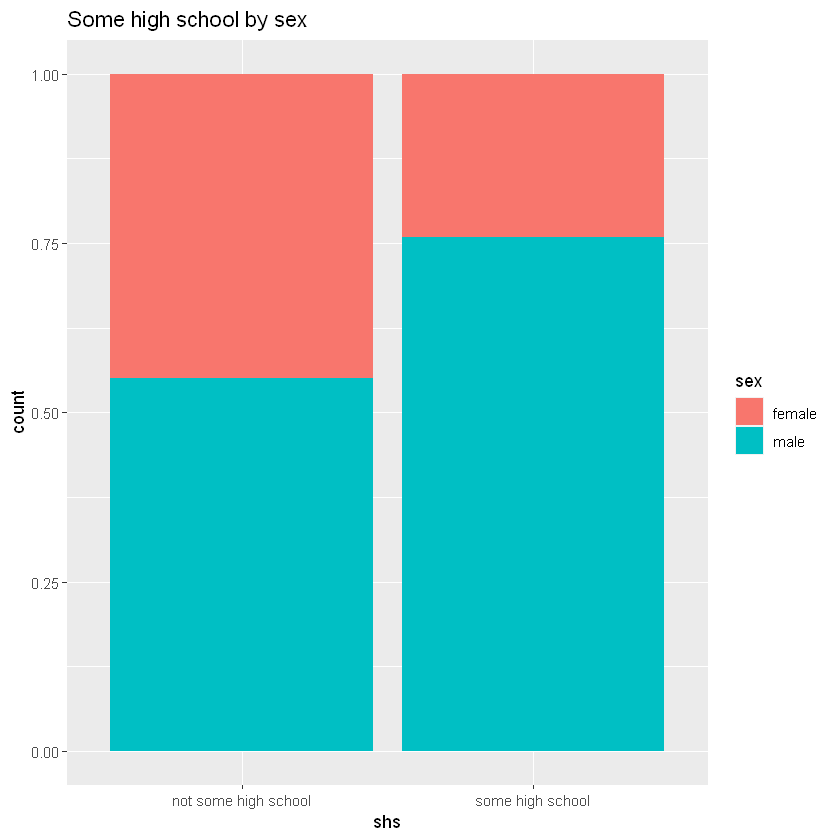

In [90]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
df["shs"][df["shs"] == 0] <- "not some high school"
df["shs"][df["shs"] == 1] <- "some high school"

data1 <- ggplot(df,aes(shs))
data1 + geom_bar(aes(fill = sex), position = "fill") + ggtitle("Some high school by sex")

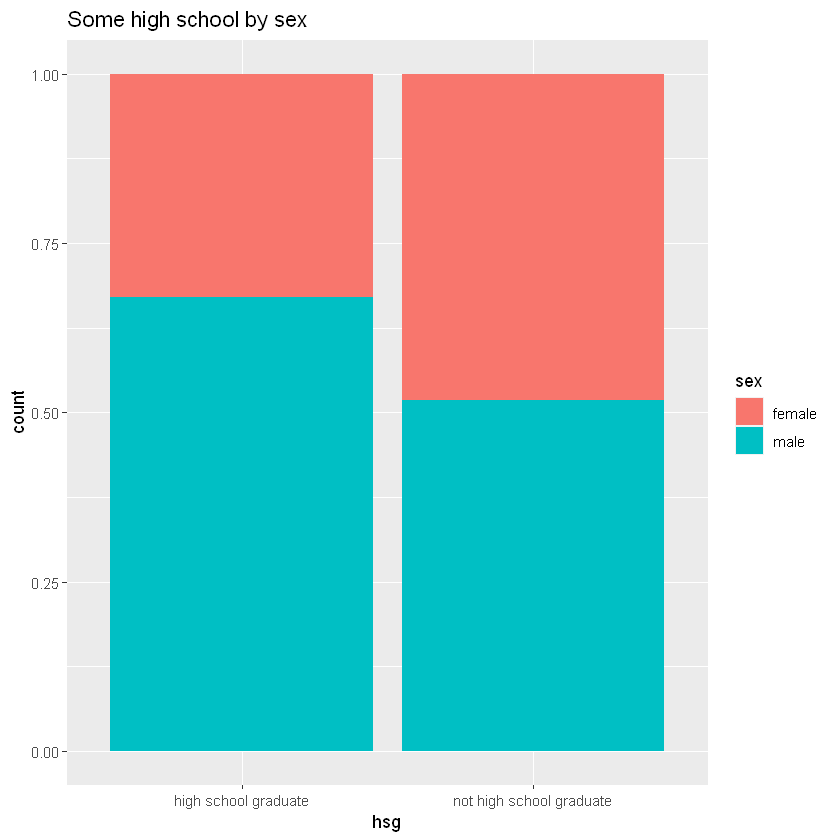

In [89]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
df["hsg"][df["hsg"] == 0] <- "not high school graduate"
df["hsg"][df["hsg"] == 1] <- "high school graduate"

data1 <- ggplot(df,aes(hsg))
data1 + geom_bar(aes(fill = sex), position = "fill") + ggtitle("High school graduated by sex")

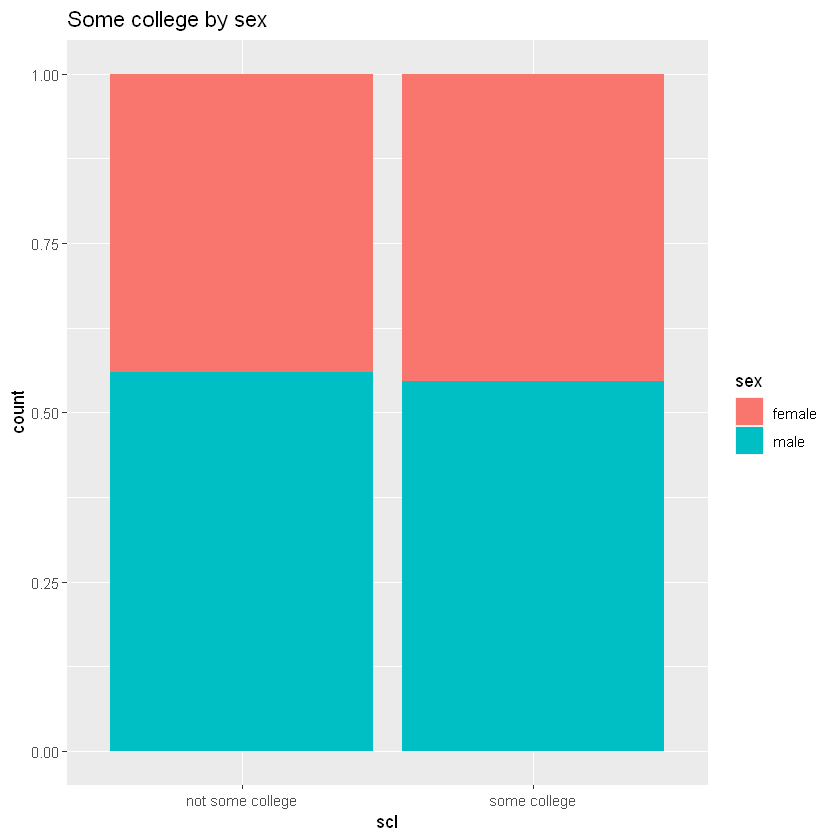

In [92]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
df["scl"][df["scl"] == 0] <- "not some college"
df["scl"][df["scl"] == 1] <- "some college"

data1 <- ggplot(df,aes(scl))
data1 + geom_bar(aes(fill = sex), position = "fill") + ggtitle("Some college by sex")

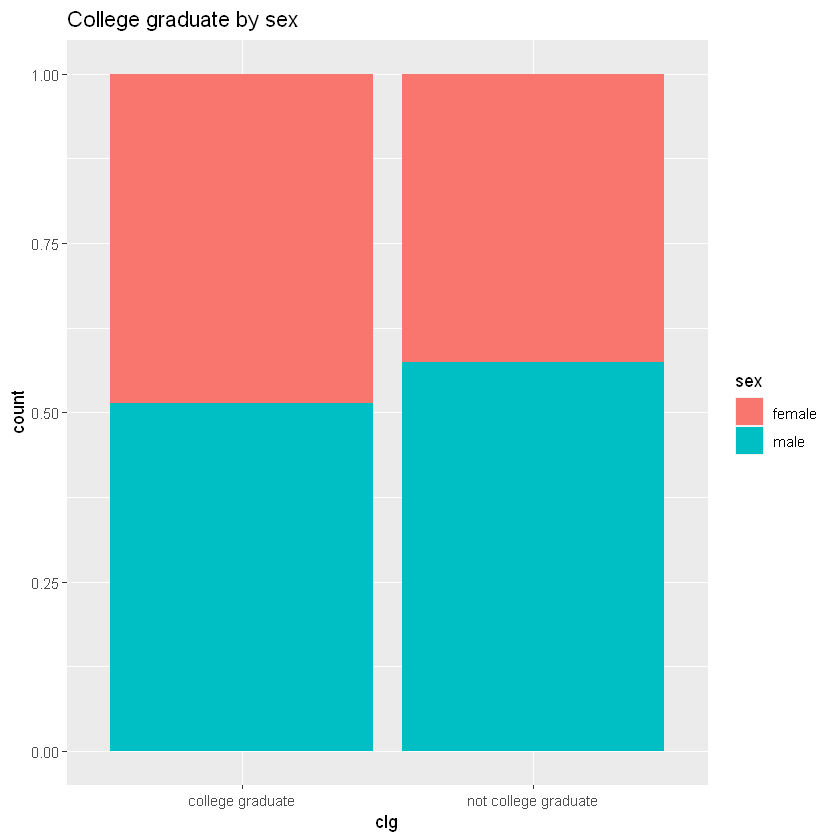

In [93]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
df["clg"][df["clg"] == 0] <- "not college graduate"
df["clg"][df["clg"] == 1] <- "college graduate"

data1 <- ggplot(df,aes(clg))
data1 + geom_bar(aes(fill = sex), position = "fill") + ggtitle("College graduate by sex")

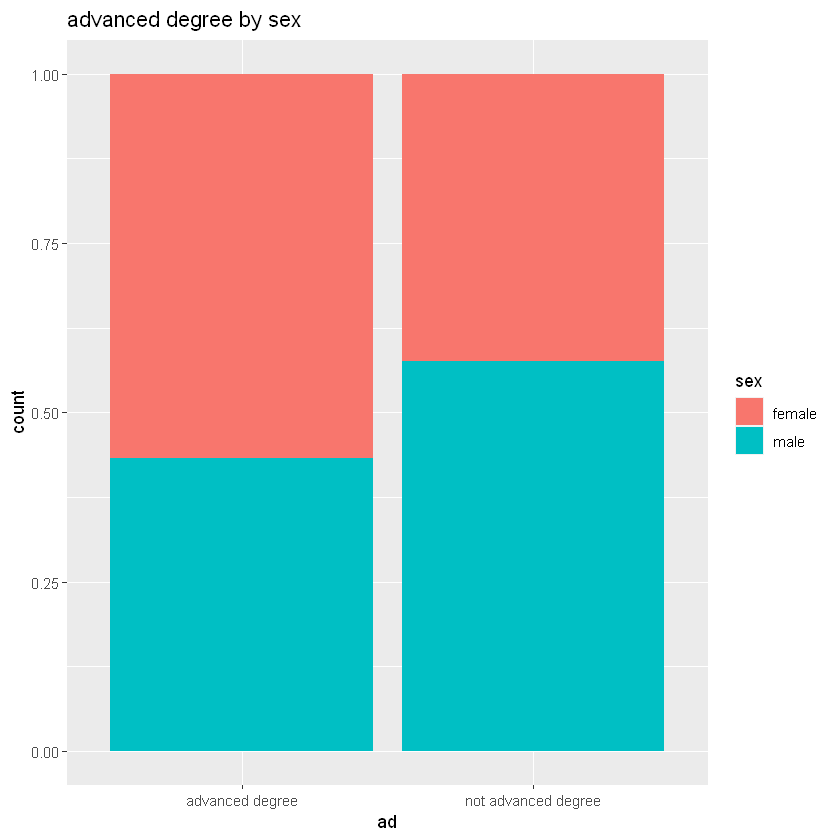

In [94]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
df["ad"][df["ad"] == 0] <- "not advanced degree"
df["ad"][df["ad"] == 1] <- "advanced degree"

data1 <- ggplot(df,aes(ad))
data1 + geom_bar(aes(fill = sex), position = "fill") + ggtitle("advanced degree by sex")

## Continue Variables 

### A. Experience

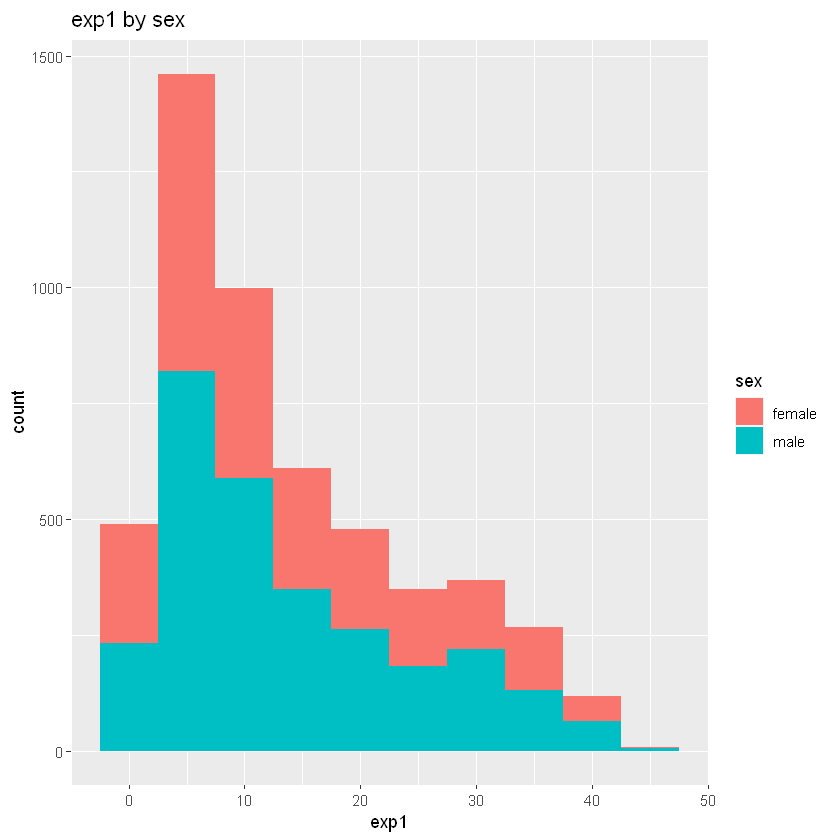

In [99]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
data1 <- ggplot(df,aes(exp1))
data1 + geom_histogram(aes(fill = sex), binwidth = 5) + ggtitle("exp1 by sex")

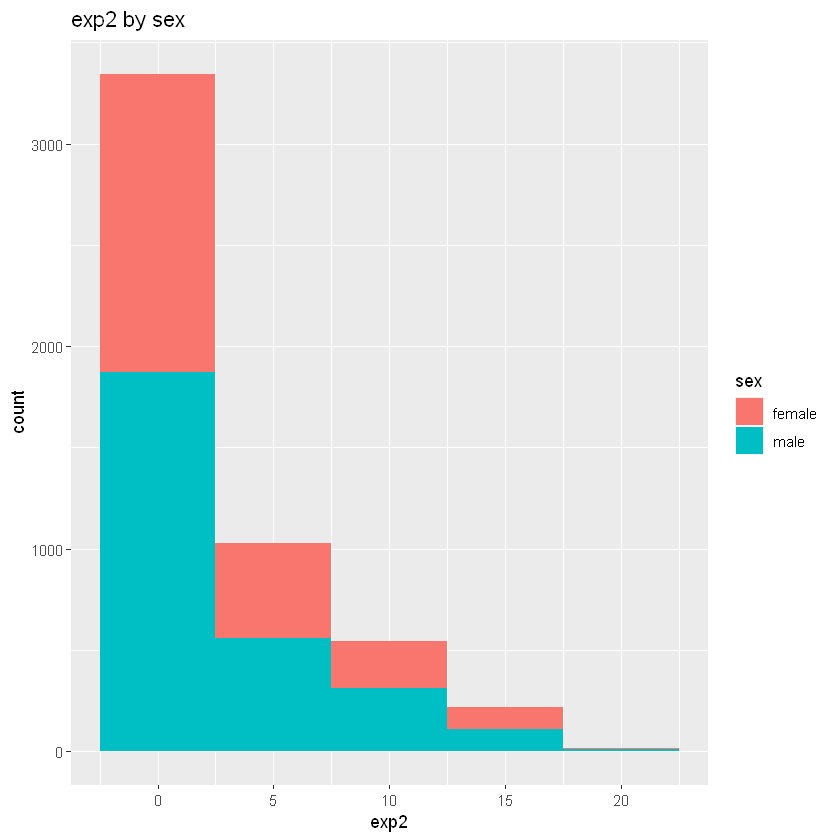

In [100]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
data1 <- ggplot(df,aes(exp2))
data1 + geom_histogram(aes(fill = sex), binwidth = 5) + ggtitle("exp2 by sex")

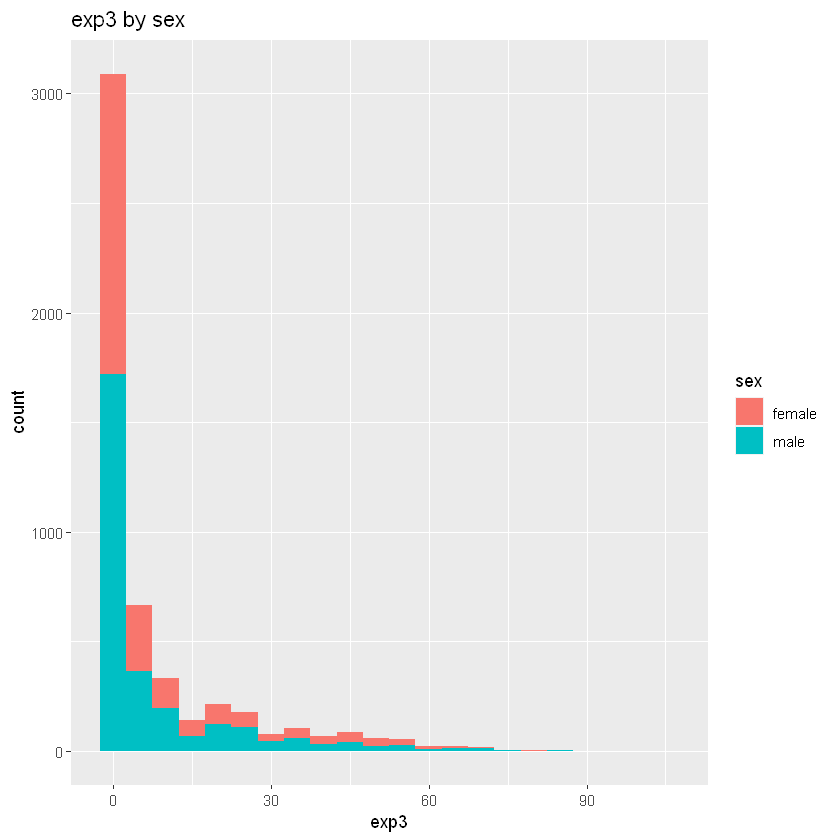

In [101]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
data1 <- ggplot(df,aes(exp3))
data1 + geom_histogram(aes(fill = sex), binwidth = 5) + ggtitle("exp3 by sex")

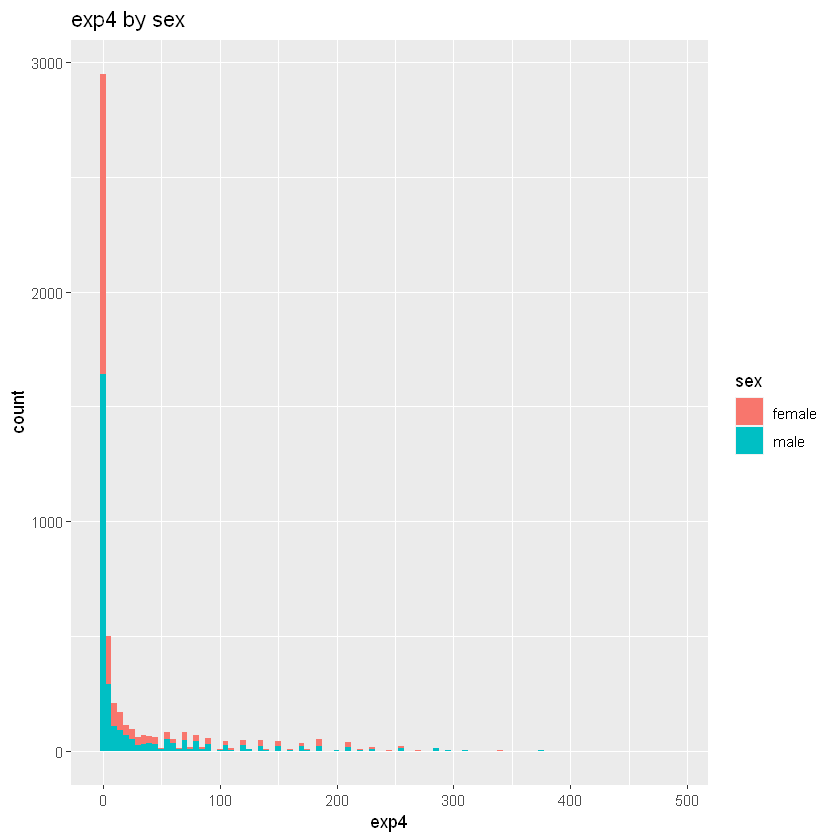

In [102]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"
data1 <- ggplot(df,aes(exp4))
data1 + geom_histogram(aes(fill = sex), binwidth = 5) + ggtitle("exp4 by sex")

Make sense that until more closer to exp4 the histogram the count tend to be more small and the experience tend to be more large. It happens because exp4 is (experience)^4

### B. wage and log wage


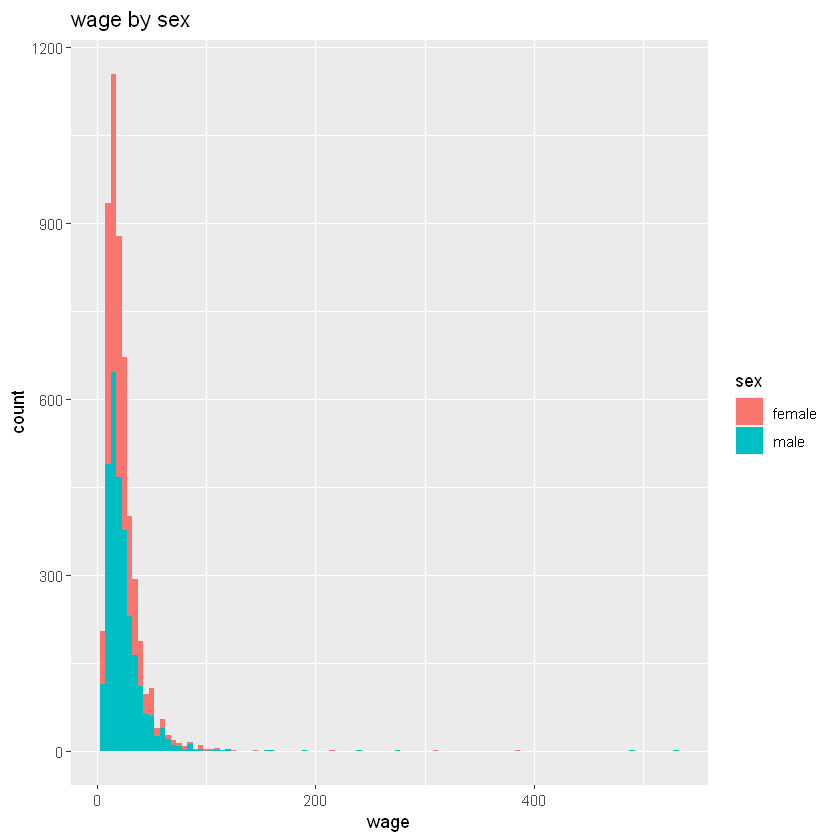

In [103]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"

data1 <- ggplot(df,aes(wage))
data1 + geom_histogram(aes(fill = sex), binwidth = 5) + ggtitle("wage by sex")

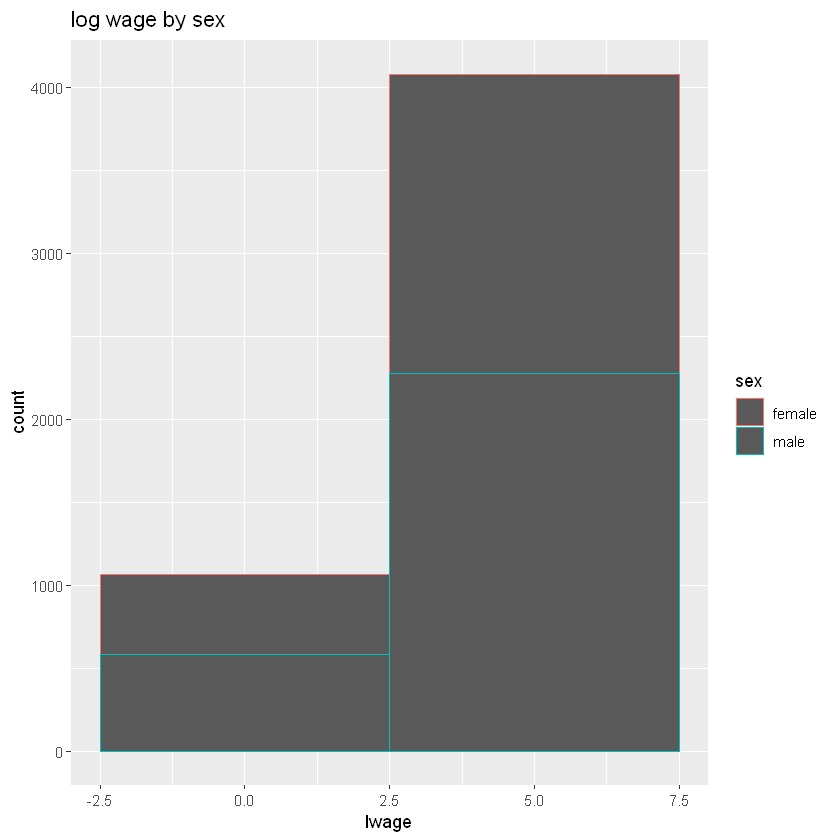

In [108]:
df <- as.data.frame(data)
df["sex"][df["sex"] == 0] <- "male"
df["sex"][df["sex"] == 1] <- "female"

data1 <- ggplot(df,aes(lwage))
data1 + geom_histogram(aes(color = sex), binwidth = 5) + ggtitle("log wage by sex")

### C. Lwage - exp1 


Here we do a scatter plot between lwage and exp 1. We chose lwage because their histogram is like a normal distribution, and the same for exp1. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



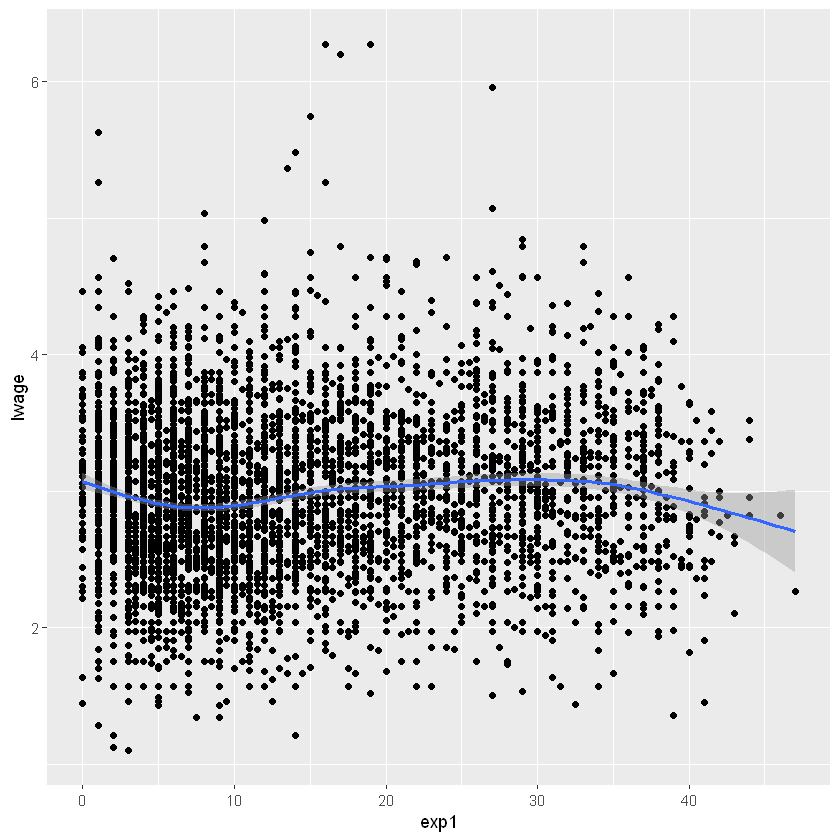

In [110]:
df <- as.data.frame(data)
data1 <- ggplot(df,aes(y=lwage,x=exp1))
data1 + geom_point() + geom_smooth()

how it shows, when the experience is elevated to 1, the relation between the log wage is positive. But according to the paper readed, it isn't normal because when the experience growth the lof wage slower down. 

# 3. Replication graphic paper

In [111]:
install.packages("sandwich")
library(sandwich)

Installing package into 'D:/Kenia/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kenia\AppData\Local\Temp\RtmpInsAoZ\downloaded_packages


Warning message:
"package 'sandwich' was built under R version 4.0.5"


In [114]:
install.packages("xtable")
library(xtable)


Installing package into 'D:/Kenia/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kenia\AppData\Local\Temp\RtmpInsAoZ\downloaded_packages


Warning message:
"package 'xtable' was built under R version 4.0.5"


In [120]:
a <-data[which(colnames(data) %in% c("lwage","sex","clg","scl","exp1","exp2","exp3","exp4"))]
d_male <- data[data$sex==0,]
a_male <- d_male[which(colnames(data) %in% c("lwage","sex","clg","scl","exp1","exp2","exp3","exp4"))]
dim(a_male)

[1] 2861    8

In [124]:
library(dplyr)

In [125]:
y <- lwage ~  (exp1+exp2+exp3+exp4)^4
ty <- lm(y, data=data)
y_predict <- predict(ty)
data$y_predict=y_predict

In [126]:
d_scl <- data[data$scl==1,]
d_clg <- data[data$clg==1,]

In [147]:
t_scl=d_scl%>% 
  group_by(exp1) %>% 
  summarise(PPredict = mean(y_predict))

nivel_scl = c(unique(d_scl$exp1))
nivel_scl = sort(nivel_scl)

Prom=rep(0,length(unique(d_scl$exp1)))
length(Prom)
for (i in 1:80) {Prom[i]= mean(d_scl$y_predict[d_scl$exp1<=nivel_scl[i]])}

t_scl$PromM=Prom
head(t_scl)

[1] 80

exp1,PPredict,PromM
<dbl>,<dbl>,<dbl>
3.0,2.966992,2.966992
3.5,2.941599,2.951936
4.0,2.919696,2.942185
4.5,2.901839,2.930133
5.0,2.888172,2.923039
5.5,2.878552,2.915803


In [148]:
T_clg=d_clg%>% 
  group_by(exp1) %>% 
  summarise(PromPredict = mean(y_predict))

nivel_clg = c(unique(d_clg$exp1))
nivel_clg = sort(nivel_clg)

Promedio=rep(0,length(unique(d_clg$exp1)))
length(Promedio)
for (i in 1:40) {Promedio[i]= mean(d_clg$y_predict[d_clg$exp1<=nivel_clg[i]])}

T_clg$PromedioM=Promedio
head(T_clg)

[1] 40

exp1,PromPredict,PromedioM
<dbl>,<dbl>,<dbl>
1,3.068063,3.068063
2,3.022980,3.047255
3,2.966992,3.023090
4,2.919696,3.002590
5,2.888172,2.985764
6,2.872648,2.973857


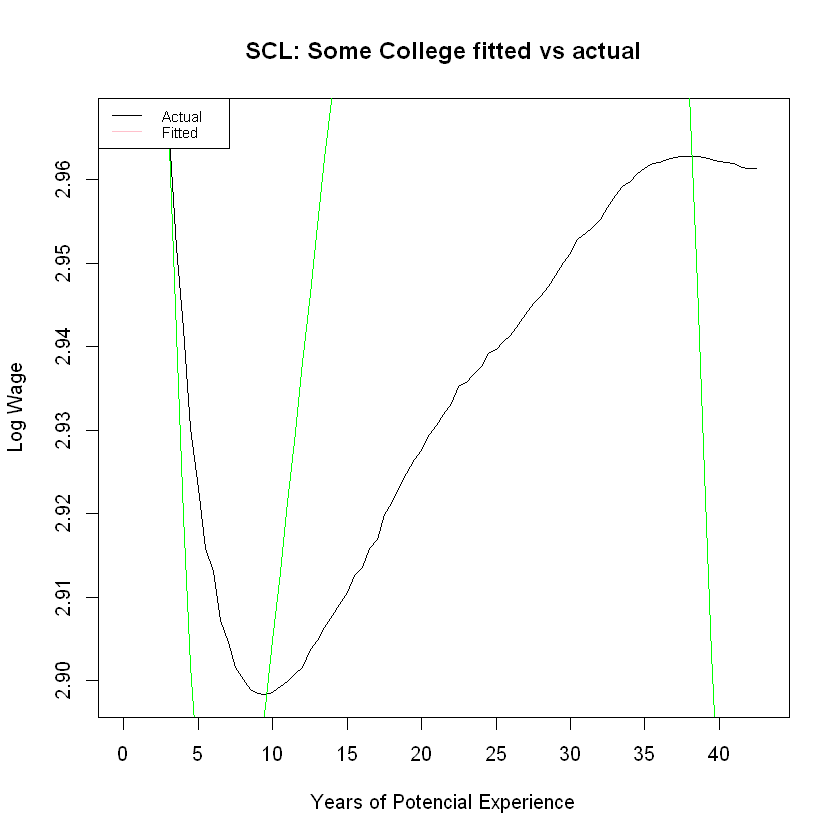

In [149]:
plot(t_scl$exp1,t_scl$PromM, xlab = "Years of Potencial Experience", 
     ylab="Log Wage", main="SCL: Some College fitted vs actual", 
     xlim=c(0,43), xaxt='n',type = 'l', col="black")
lines(t_scl$exp1,t_scl$PPredict, col="green")
axis(side = 1, at=seq(0,43,by=5))
legend(x="topleft",
       legend = c("Actual", "Fitted")
       ,col = c("black", "pink")
       ,cex=0.75, x.intersp=1.5, y.intersp=0.8, text.width = c(4), 
       lty=c(1,1))


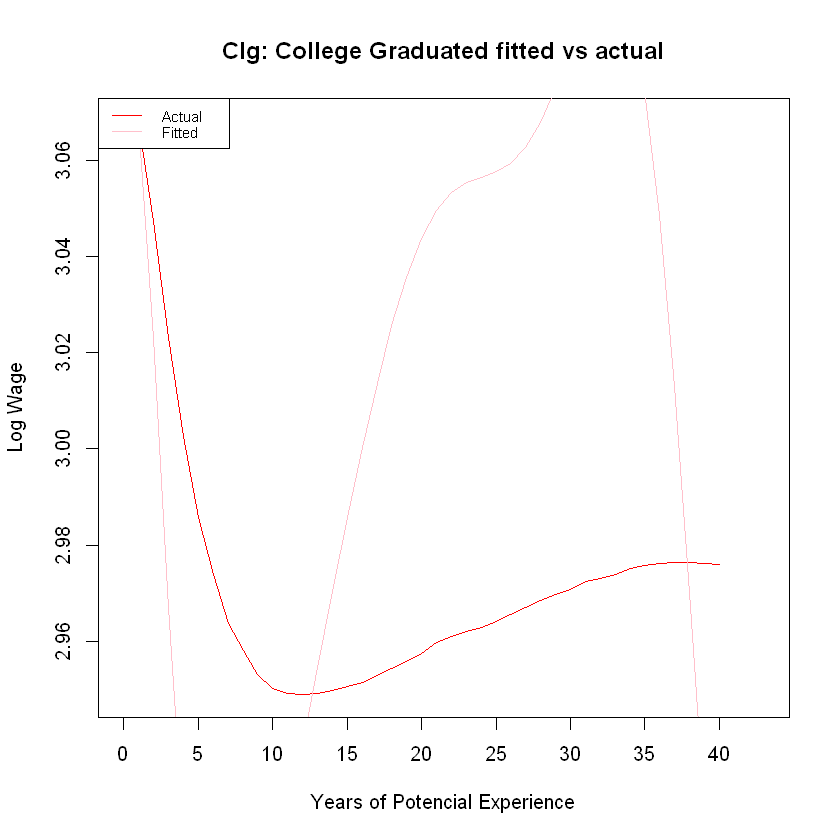

In [150]:
plot(T_clg$exp1,T_clg$PromedioM, xlab = "Years of Potencial Experience", 
     ylab="Log Wage", main="Clg: College Graduated fitted vs actual", 
     xlim=c(0,43), xaxt='n',type = 'l', col="red")
lines(T_clg$exp1,T_clg$PromPredict, col="pink")
axis(side = 1, at=seq(0,43,by=5))
legend(x="topleft",
       legend = c("Actual", "Fitted")
       ,col = c("red", "pink")
       ,cex=0.75, x.intersp=1.5, y.intersp=0.8, text.width = c(4), 
       lty=c(1,1))


## 5. GRAPHICS 

In [ ]:
library(coefplot)
# The No-Control model
coefplot.default(nocontrol.fit, parm= -1)

In [ ]:
# The Control model
coefplot.default(control.est, parm = -1)


In [ ]:
# The 'Partialling-Out' model

coefplot(partial.fit , parm = -1)